In [23]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#load the data matrics
matrix_2st=np.loadtxt('right2st.txt')
print('2 state scenario matrics has the shape:',matrix_2st.shape)

2 state scenario matrics has the shape: (6312, 14)


In [25]:
str1 = ",".join(str(i) for i in matrix_2st)
str1 = str1.split(",")
str1

['[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1.]',
 '[0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.]',
 '[1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]',
 '[1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 0. 2. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1

# weight [2,3,1,1,2,1]

In [7]:
weight = [2,3,1,1,2,1,2,3,1,1,2,1]

matrix1 = matrix_2st[:,2:]
matrix1.shape

matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 7.,  0.,  7., ...,  0.,  3., 12.],
       [ 0.,  0., 16., ...,  0., 11.,  5.],
       [ 0.,  0., 16., ...,  0., 12.,  5.]])

In [8]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
matrix1st[:,6]*=weight[6]
matrix1st[:,7]*=weight[7]
matrix1st[:,8]*=weight[8]
matrix1st[:,9]*=weight[9]
matrix1st[:,10]*=weight[10]
matrix1st[:,11]*=weight[11]
clustering1 = DBSCAN(0.36,200).fit(matrix1st)
label1 = clustering1.labels_
print(len(np.unique(clustering1.labels_)))
print(clustering1.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

1
[-1 -1 -1 ... -1 -1 -1]


In [12]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
eps=[]
np1=[]
score = []
for k in range(0, 60):
    ep = 0.26 + 0.01*k
    for i in range(0,40):   
        npp = 10 +10*i
        dbscan = DBSCAN(ep,npp).fit(matrix1st)
        labels = dbscan.labels_
        try:
            ch = metrics.calinski_harabasz_score(matrix1st, labels)
            print(ep,npp,ch)
            eps.append(ep)
            np1.append(npp)
            score.append(ch)
        except ValueError:
            print('shit!')

0.26 10 368.5606417968065
0.26 20 191.3048953403303
0.26 30 324.46687803210784
0.26 40 64.43233971596081
0.26 50 23.11730032754489
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.27 10 382.6796839887378
0.27 20 171.48286587964176
0.27 30 375.16000187659535
0.27 40 95.35829067759596
0.27 50 26.273351869732586
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.28 10 449.7405394055176
0.28 20 283.1484751087288
0.28 30 379.0462861395579
0.28 40 176.23103942391955
0.28 50 47.12276152311295
0.28 60 15.490580820063405
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
sh

0.41000000000000003 110 1773.9705808106817
0.41000000000000003 120 1732.3206605185926
0.41000000000000003 130 1680.0156580247979
0.41000000000000003 140 1611.9693305719986
0.41000000000000003 150 1535.2621025453261
0.41000000000000003 160 1418.3259505692702
0.41000000000000003 170 1351.1814953731061
0.41000000000000003 180 1279.0837263683602
0.41000000000000003 190 1216.5568583080963
0.41000000000000003 200 1162.0703780395634
0.41000000000000003 210 1068.4919265374779
0.41000000000000003 220 909.2356783367462
0.41000000000000003 230 767.6378694466812
0.41000000000000003 240 683.4011589133898
0.41000000000000003 250 580.8368213245608
0.41000000000000003 260 496.5212662139977
0.41000000000000003 270 409.93959590657704
0.41000000000000003 280 313.97030463668557
0.41000000000000003 290 171.72231097933397
0.41000000000000003 300 169.41397774641484
0.41000000000000003 310 80.21815525548318
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.42000000000000004 10 1683.2191217813802
0.42000

0.47 400 700.6498643958988
0.48 10 1698.8184018517127
0.48 20 1691.782493757808
0.48 30 1683.698740908118
0.48 40 1639.138799405865
0.48 50 1584.249972542362
0.48 60 1532.803075308946
0.48 70 1182.3192391119271
0.48 80 1355.2072387924225
0.48 90 1265.9425041810612
0.48 100 1483.0663341467405
0.48 110 1023.8620090059181
0.48 120 1567.1701243634302
0.48 130 944.8155872172097
0.48 140 1200.661715326026
0.48 150 1952.127649671976
0.48 160 1917.7220427420536
0.48 170 1888.7100048547077
0.48 180 1854.9595339366363
0.48 190 1842.6256424715689
0.48 200 1822.4131531546
0.48 210 1792.7648321872048
0.48 220 1773.747736843399
0.48 230 1749.425007784236
0.48 240 1689.0537328909836
0.48 250 1632.971662985713
0.48 260 1540.9473087170463
0.48 270 1504.3287304033327
0.48 280 1465.3439794416265
0.48 290 1433.2797984968763
0.48 300 1401.2681557866783
0.48 310 1374.372862865137
0.48 320 1334.6495823583284
0.48 330 1257.9475484751547
0.48 340 1225.8181196555613
0.48 350 1164.6542233716339
0.48 360 1096.555

0.55 200 1270.1423616413465
0.55 210 2067.5876288063714
0.55 220 2048.9925466510144
0.55 230 2027.386358124128
0.55 240 2025.6496803688747
0.55 250 2016.4098514641798
0.55 260 2006.1735684502212
0.55 270 1999.1552415160966
0.55 280 1981.4044945829653
0.55 290 1974.0719100262418
0.55 300 1948.1694187958296
0.55 310 1931.0395546922273
0.55 320 1910.3523471742217
0.55 330 1896.2210539489608
0.55 340 1880.2731632612463
0.55 350 1835.932844559133
0.55 360 1816.6716341573467
0.55 370 1789.1907408203392
0.55 380 1761.144715351981
0.55 390 1729.816055420883
0.55 400 1704.8861638568178
0.56 10 1707.1204334927422
0.56 20 1702.7336207408093
0.56 30 1700.133259957294
0.56 40 1699.2604235066062
0.56 50 1691.5230649719786
0.56 60 1682.9959870521664
0.56 70 1668.612799919747
0.56 80 1637.7130160097913
0.56 90 1616.6828483522247
0.56 100 1563.8669662411041
0.56 110 1533.3328905086391
0.56 120 1438.187849749109
0.56 130 1834.609980988763
0.56 140 1737.5497970307788
0.56 150 1629.8702895683937
0.56 160 

0.6000000000000001 380 2016.8567735681154
0.6000000000000001 390 2004.0367421106714
0.6000000000000001 400 2000.7251084453687
0.6100000000000001 10 1706.359840741708
0.6100000000000001 20 1704.8544530047755
0.6100000000000001 30 1703.4497292428368
0.6100000000000001 40 1704.2453625144585
0.6100000000000001 50 1703.3552940197644
0.6100000000000001 60 1703.6110019399146
0.6100000000000001 70 1700.1215525279526
0.6100000000000001 80 1695.9077154624986
0.6100000000000001 90 1685.1371398991625
0.6100000000000001 100 1657.2470911357734
0.6100000000000001 110 1642.835153195847
0.6100000000000001 120 1626.954657255129
0.6100000000000001 130 1590.028122688998
0.6100000000000001 140 1547.8621919228458
0.6100000000000001 150 1498.1752669015475
0.6100000000000001 160 1916.802480978561
0.6100000000000001 170 1872.1198020909335
0.6100000000000001 180 1800.8579336443026
0.6100000000000001 190 1698.1846063939875
0.6100000000000001 200 1612.2344500183772
0.6100000000000001 210 2034.1860542571578
0.6100

0.67 350 2223.0549073567927
0.67 360 2216.968795471233
0.67 370 2205.0584457605755
0.67 380 2199.224553421549
0.67 390 2186.8072811986453
0.67 400 2186.8072811986453
0.6799999999999999 10 1707.557263022537
0.6799999999999999 20 1709.7315712675324
0.6799999999999999 30 1707.9656461455447
0.6799999999999999 40 1707.9656461455447
0.6799999999999999 50 1712.5748684312873
0.6799999999999999 60 1709.1525075944858
0.6799999999999999 70 1709.6722738165695
0.6799999999999999 80 1712.0836869837972
0.6799999999999999 90 1710.9566164951968
0.6799999999999999 100 1713.1896571064062
0.6799999999999999 110 1709.0660202831968
0.6799999999999999 120 1709.4490091732598
0.6799999999999999 130 1691.7525381304706
0.6799999999999999 140 1676.0286204221068
0.6799999999999999 150 1664.4893013020435
0.6799999999999999 160 1640.4723633310655
0.6799999999999999 170 1625.0014240605308
0.6799999999999999 180 1595.0084625870834
0.6799999999999999 190 1562.9286685539937
0.6799999999999999 200 2030.9706766786949
0.67

0.74 350 2199.159007443127
0.74 360 2133.2193346188164
0.74 370 2087.240192679145
0.74 380 2025.1391764298123
0.74 390 1848.292802919714
0.74 400 1788.9476838529883
0.75 10 1710.1292572929094
0.75 20 1710.1292572929094
0.75 30 1709.598459861157
0.75 40 1712.061664319568
0.75 50 1711.854539212761
0.75 60 1713.8560730364761
0.75 70 1712.6803686996761
0.75 80 1712.5404142239656
0.75 90 1712.082106531069
0.75 100 1714.6246789501477
0.75 110 1714.6246789501477
0.75 120 1714.511953512418
0.75 130 1714.511953512418
0.75 140 1714.8106472594811
0.75 150 1713.4722138489465
0.75 160 1707.5693607920634
0.75 170 1703.5313950672855
0.75 180 1702.6185547851119
0.75 190 1699.4444268030952
0.75 200 1687.3097637179735
0.75 210 1683.1157027712254
0.75 220 1673.3053269707023
0.75 230 1665.0578354277486
0.75 240 1626.1110431719922
0.75 250 2135.053433818066
0.75 260 2116.2943623555525
0.75 270 2085.2895483671405
0.75 280 2053.9222921636697
0.75 290 2026.077175912562
0.75 300 2011.2247841268506
0.75 310 195

0.8200000000000001 110 1712.388947035247
0.8200000000000001 120 1714.9666283775168
0.8200000000000001 130 1714.9666283775168
0.8200000000000001 140 1716.3650222412216
0.8200000000000001 150 1716.3650222412216
0.8200000000000001 160 1715.7101041282158
0.8200000000000001 170 1714.2804357088532
0.8200000000000001 180 1712.250190157622
0.8200000000000001 190 1712.343392234267
0.8200000000000001 200 1713.000759066819
0.8200000000000001 210 1711.0191638716233
0.8200000000000001 220 1710.3419399459126
0.8200000000000001 230 1714.3642409540937
0.8200000000000001 240 1714.962032554463
0.8200000000000001 250 1713.0125739725336
0.8200000000000001 260 1705.320186569568
0.8200000000000001 270 1690.7514958258391
0.8200000000000001 280 1668.4338316656197
0.8200000000000001 290 1654.7046422982173
0.8200000000000001 300 2175.5694644863033
0.8200000000000001 310 2168.453286433666
0.8200000000000001 320 2154.441022437458
0.8200000000000001 330 2144.4444081642387
0.8200000000000001 340 2129.5559406178622


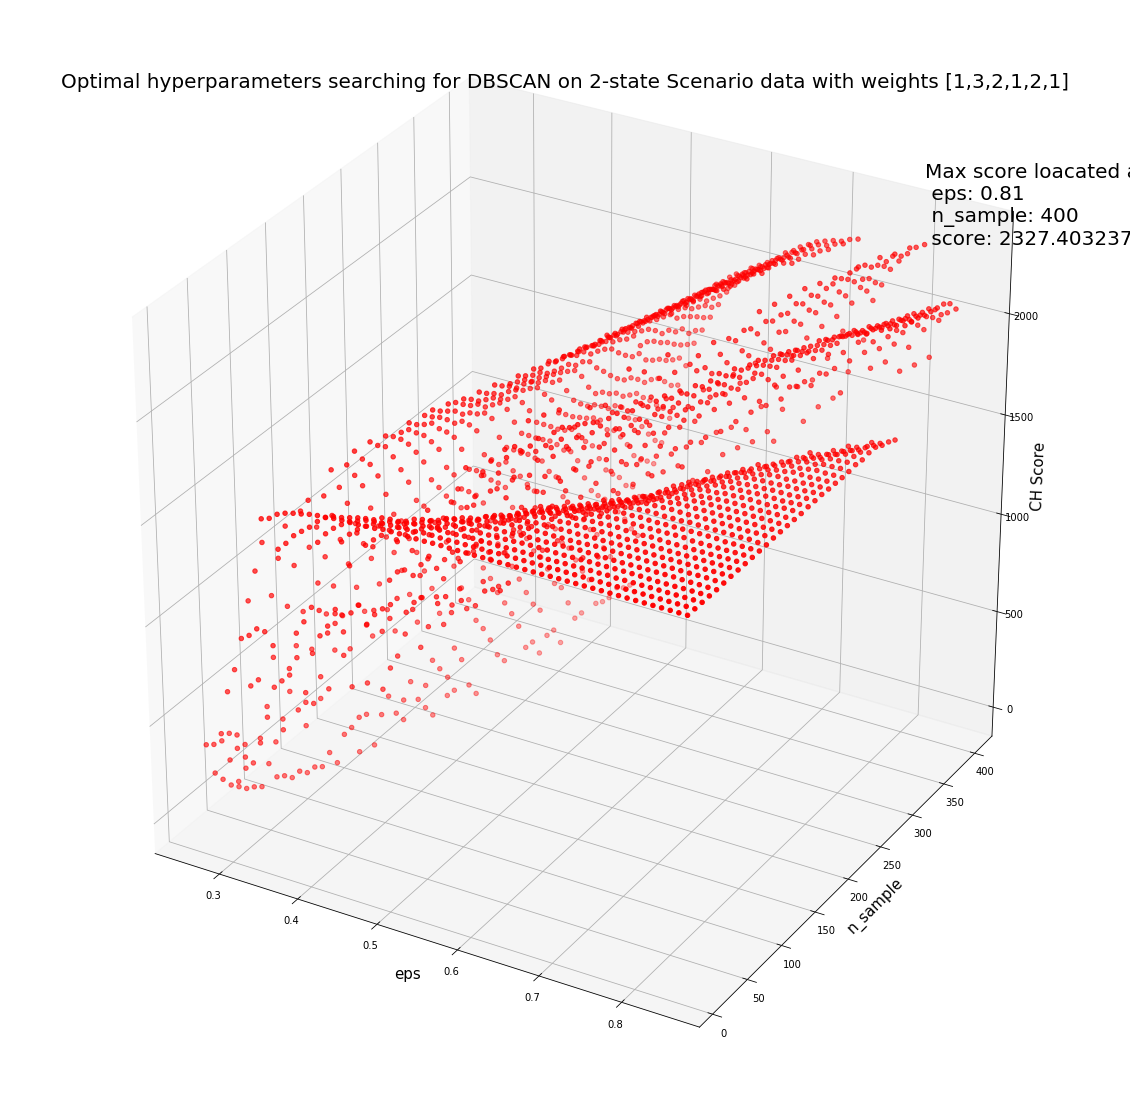

In [14]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
#x_surf, y_surf = np.meshgrid(eps, np)
#ax.plot_surface(eps, np,score ,rstride=1,cstride=1,cmap=plt.cm.hot)#生成一个曲面
#ax.contourf(X,Y,Z,offset=2,alpha=0.75,cmap=plt.cm.hot)#为等高线填充颜色
#ax.contour(x_surf, y_surf, score, offset=-2, colors='black')
#ax.plot_trisurf(eps, np1,score.ravel(), cmap=plt.cm.hot,shade=True)
#ax.contour(eps, np1,score[::-1],offset=2,alpha=0.75,cmap=plt.cm.hot)
#max1 = np.argmax(score)
max_indx = np.argmax(score)
show_max='Max score loacated at :\n eps: '+str(eps[max_indx])+' \n n_sample: '+str(np1[max_indx])+' \n score: '+str(score[max_indx])+''
#plt.annotate(show_max,xytext=(eps[max_indx],np1[max_indx],score[max_indx]),xy=(eps[max_indx],np1[max_indx],score[max_indx]))
ax.text(eps[max_indx],np1[max_indx],score[max_indx], show_max , size=20, zorder=1,color='k')
ax.scatter(eps, np1, score, c='red', cmap=plt.cm.hot)
ax.set_title('Optimal hyperparameters searching for DBSCAN on 2-state Scenario data with weights [1,3,2,1,2,1]',fontsize = 20)
ax.set_xlabel('eps',fontsize = 15)
ax.set_ylabel('n_sample',fontsize = 15)
ax.set_zlabel('CH Score',fontsize = 15)
plt.show()

In [13]:
def plot_embedding(X, y, label,title=None):

    plt.figure(figsize=(20, 20))
    ax = plt.subplot(111)
    plt.scatter(X[:,0], X[:,1], c = label)
    for i in range(int(len(X)/50)):   
        plt.text(X[50*i, 0], X[50*i, 1], y[50*i],
                 fontsize=15)
 #plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    plt.show()

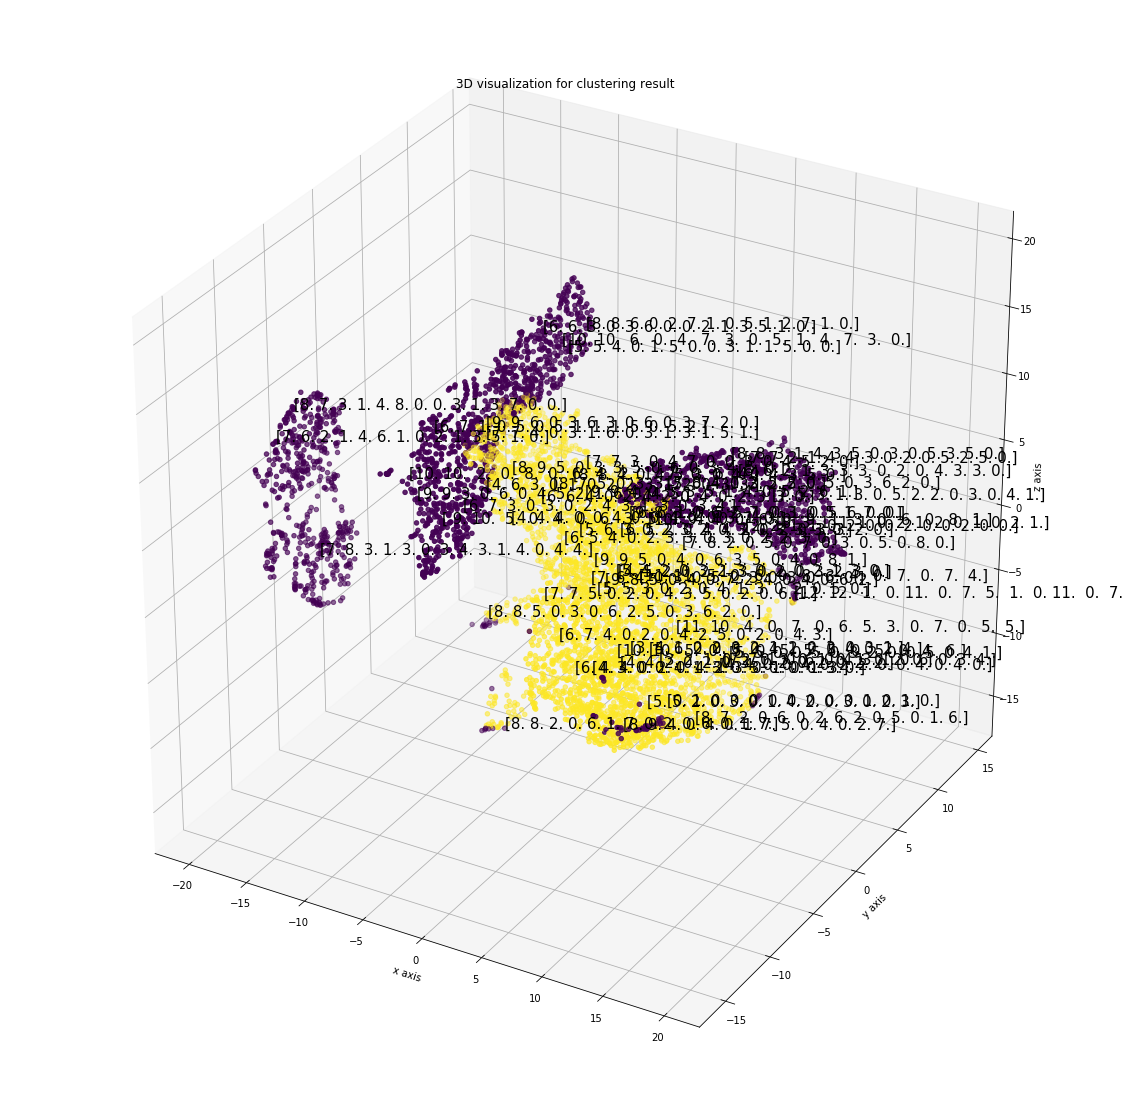

In [16]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x0 = [] 
y0 = []
z0 = []
pred0 = []
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
x6 = [] 
y6 = []
z6 = []
pred6 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(clustering1.labels_[i])
for i in range(len(data[:,0])):
    if clustering1.labels_[i] == -1:
        x0.append(data[i,0])
        y0.append(data[i,1])
        z0.append(data[i,2])
        pred0.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(clustering1.labels_[i])
    if clustering1.labels_[i] == 4:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(clustering1.labels_[i])
    else:
        x6.append(data[i,0])
        y6.append(data[i,1])
        z6.append(data[i,2])
        pred6.append(clustering1.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
#ax.scatter(x3, y3, z3, c = 'yellow',label = 'Cluster 3')
#ax.scatter(x4, y4, z4, c = 'green',label = 'Cluster 4')
#ax.scatter(x5, y5, z5, c = '#800080',label = 'Cluster 5')
ax.scatter(x0, y0, z0, c = 'orange',label = 'Outlier')
for i in range(int(len(data)/1000)):
    ax.text(x[1000*i], y[1000*i], z[1000*i],str1[1000*i],
             fontsize=15)
plt.title("3D visualization for DBSCAN clustering result in case of [2,3,1,1,2,1]",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# weight [1,1,1,1,1,1]

In [18]:
weight = [1,1,1,1,1,1,1,1,1,1,1,1]

matrix1 = matrix_2st[:,2:]
matrix1.shape

matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 7.,  0.,  7., ...,  0.,  3., 12.],
       [ 0.,  0., 16., ...,  0., 11.,  5.],
       [ 0.,  0., 16., ...,  0., 12.,  5.]])

In [19]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
matrix1st[:,6]*=weight[6]
matrix1st[:,7]*=weight[7]
matrix1st[:,8]*=weight[8]
matrix1st[:,9]*=weight[9]
matrix1st[:,10]*=weight[10]
matrix1st[:,11]*=weight[11]
clustering2 = DBSCAN(0.28,80).fit(matrix1st)
label2 = clustering2.labels_
print(len(np.unique(clustering2.labels_)))
print(clustering2.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

4
[ 0  0  0 ... -1 -1 -1]


In [20]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
eps1=[]
np11=[]
score1 = []
for k in range(0, 60):
    ep = 0.26 + 0.01*k
    for i in range(0,40):   
        npp = 10 +10*i
        dbscan = DBSCAN(ep,npp).fit(matrix1st)
        labels = dbscan.labels_
        try:
            ch = metrics.calinski_harabasz_score(matrix1st, labels)
            print(ep,npp,ch)
            eps1.append(ep)
            np11.append(npp)
            score1.append(ch)
        except ValueError:
            print('shit!')

0.26 10 455.1893475456807
0.26 20 455.1364661399378
0.26 30 390.94829208913
0.26 40 367.9563549686974
0.26 50 289.80327443246995
0.26 60 364.59373807003294
0.26 70 323.7157469001991
0.26 80 422.6310338099746
0.26 90 661.8608744024358
0.26 100 646.4865518368773
0.26 110 629.1051654508069
0.26 120 614.0079702904467
0.26 130 588.3716395142172
0.26 140 566.7630041158175
0.26 150 533.8550429598381
0.26 160 499.0449772703659
0.26 170 464.39230303226856
0.26 180 433.3892656943857
0.26 190 384.17776571495745
0.26 200 340.510162257018
0.26 210 288.49462781992275
0.26 220 185.94574462544713
0.26 230 184.49312846106193
0.26 240 93.53072789386627
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.27 10 456.0057383325928
0.27 20 454.746303223559
0.27 30 449.2791850679608
0.27 40 378.8875926575566
0.27 50 354.50421180551274
0.27 60 316.7003747777434
0.27 70 428.59307162603704
0.27 80 289.7292033846666
0.27 90 680.9552988877605
0.27 100 672.3793304269875

0.34 20 455.16318965513693
0.34 30 457.323829751409
0.34 40 463.99891265290745
0.34 50 463.97416687844105
0.34 60 461.6524276353972
0.34 70 459.7981403036927
0.34 80 399.44054321686156
0.34 90 385.01029861189517
0.34 100 365.36334548413055
0.34 110 519.9665436119147
0.34 120 514.4318295399279
0.34 130 492.7993019375275
0.34 140 435.02598481033664
0.34 150 387.50480088196446
0.34 160 481.91100916725395
0.34 170 743.0890573732866
0.34 180 737.8570778727462
0.34 190 732.5988004587253
0.34 200 726.427315896143
0.34 210 719.5200917573214
0.34 220 714.6175487269245
0.34 230 710.6936276096878
0.34 240 705.9972809162081
0.34 250 700.5718289419619
0.34 260 690.887361974188
0.34 270 684.8284300043665
0.34 280 679.6592562412511
0.34 290 676.6621666600261
0.34 300 668.2372871241124
0.34 310 663.7024505447329
0.34 320 656.7090685287269
0.34 330 649.0967661138708
0.34 340 641.2863087944542
0.34 350 630.9082593617312
0.34 360 616.4613926727434
0.34 370 608.3225248385712
0.34 380 600.4778648408095
0.3

0.41000000000000003 190 541.4568717596926
0.41000000000000003 200 526.6655228436398
0.41000000000000003 210 666.0683159394728
0.41000000000000003 220 657.1026384202872
0.41000000000000003 230 646.0417636079767
0.41000000000000003 240 628.1219258104064
0.41000000000000003 250 597.2778466433247
0.41000000000000003 260 501.34236038459284
0.41000000000000003 270 789.7413254380616
0.41000000000000003 280 787.1498802318546
0.41000000000000003 290 785.8082505142472
0.41000000000000003 300 783.8366518199432
0.41000000000000003 310 783.8366518199432
0.41000000000000003 320 781.3219250426171
0.41000000000000003 330 776.6515241956342
0.41000000000000003 340 772.7061636730922
0.41000000000000003 350 768.5089299270074
0.41000000000000003 360 766.5396422948917
0.41000000000000003 370 761.7620154037145
0.41000000000000003 380 761.3928644048713
0.41000000000000003 390 760.7847907592484
0.41000000000000003 400 760.4723200612989
0.42000000000000004 10 453.4624719766002
0.42000000000000004 20 453.8592716

0.47 270 538.5718107827589
0.47 280 506.6682144761389
0.47 290 685.437034753703
0.47 300 677.3801527221414
0.47 310 660.9715901820861
0.47 320 645.0343826639698
0.47 330 629.7151349493043
0.47 340 619.0919877624784
0.47 350 598.7994631024392
0.47 360 550.6465067124182
0.47 370 814.8538183616987
0.47 380 814.1175428592921
0.47 390 812.4378759999786
0.47 400 811.9082641603624
0.48 10 453.37018510865585
0.48 20 453.37018510865585
0.48 30 453.4031796372541
0.48 40 455.4249289832756
0.48 50 456.5862272714334
0.48 60 456.5862272714334
0.48 70 457.152313278123
0.48 80 455.91200907088614
0.48 90 456.32381955431146
0.48 100 456.76920407503843
0.48 110 458.17462486449926
0.48 120 459.93964693445577
0.48 130 459.1957266110975
0.48 140 460.2054164401552
0.48 150 462.733004971778
0.48 160 462.64772561427145
0.48 170 463.06156108334665
0.48 180 458.7757898331127
0.48 190 462.6587437462881
0.48 200 583.8457021151543
0.48 210 581.7316656713014
0.48 220 580.5751619276201
0.48 230 577.2593544152912
0.48

0.55 230 28.316901546600405
0.55 240 29.987721434780525
0.55 250 36.73715122386004
0.55 260 40.92327430516381
0.55 270 39.901117325865165
0.55 280 46.87344727302909
0.55 290 49.49717820167618
0.55 300 49.49717820167618
0.55 310 51.450539869908695
0.55 320 62.02944500976791
0.55 330 66.15212023865702
0.55 340 82.97618571074413
0.55 350 90.18886490080263
0.55 360 98.63277692444035
0.55 370 104.2946493600582
0.55 380 110.55824926256165
0.55 390 112.77929698687203
0.55 400 119.69310567214164
shit!
shit!
shit!
shit!
shit!
shit!
0.56 70 6.313884500775847
0.56 80 6.313884500775847
0.56 90 6.313884500775847
0.56 100 6.313884500775847
0.56 110 12.043471973425715
0.56 120 11.55834702064358
0.56 130 9.81062860665586
0.56 140 14.23710430144935
0.56 150 16.356010879012945
0.56 160 16.356010879012945
0.56 170 16.356010879012945
0.56 180 16.356010879012945
0.56 190 16.356010879012945
0.56 200 16.356010879012945
0.56 210 16.356010879012945
0.56 220 18.469358994789815
0.56 230 15.85612930861399
0.56 24

0.62 260 10.143594921216385
0.62 270 10.143594921216385
0.62 280 10.143594921216385
0.62 290 10.143594921216385
0.62 300 10.143594921216385
0.62 310 10.143594921216385
0.62 320 10.143594921216385
0.62 330 10.143594921216385
0.62 340 12.721703749027833
0.62 350 12.721703749027833
0.62 360 12.721703749027833
0.62 370 15.30098422440636
0.62 380 15.30098422440636
0.62 390 15.30098422440636
0.62 400 15.30098422440636
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.63 190 6.313884500775847
0.63 200 6.313884500775847
0.63 210 6.313884500775847
0.63 220 6.313884500775847
0.63 230 6.313884500775847
0.63 240 6.313884500775847
0.63 250 6.313884500775847
0.63 260 9.39616280697857
0.63 270 9.39616280697857
0.63 280 9.39616280697857
0.63 290 9.39616280697857
0.63 300 10.143594921216385
0.63 310 10.143594921216385
0.63 320 10.143594921216385
0.63 330 10.143594921216385
0.63 340 10.143594921216385
0.63 350 10.143594921216385
0.63 360 12.721

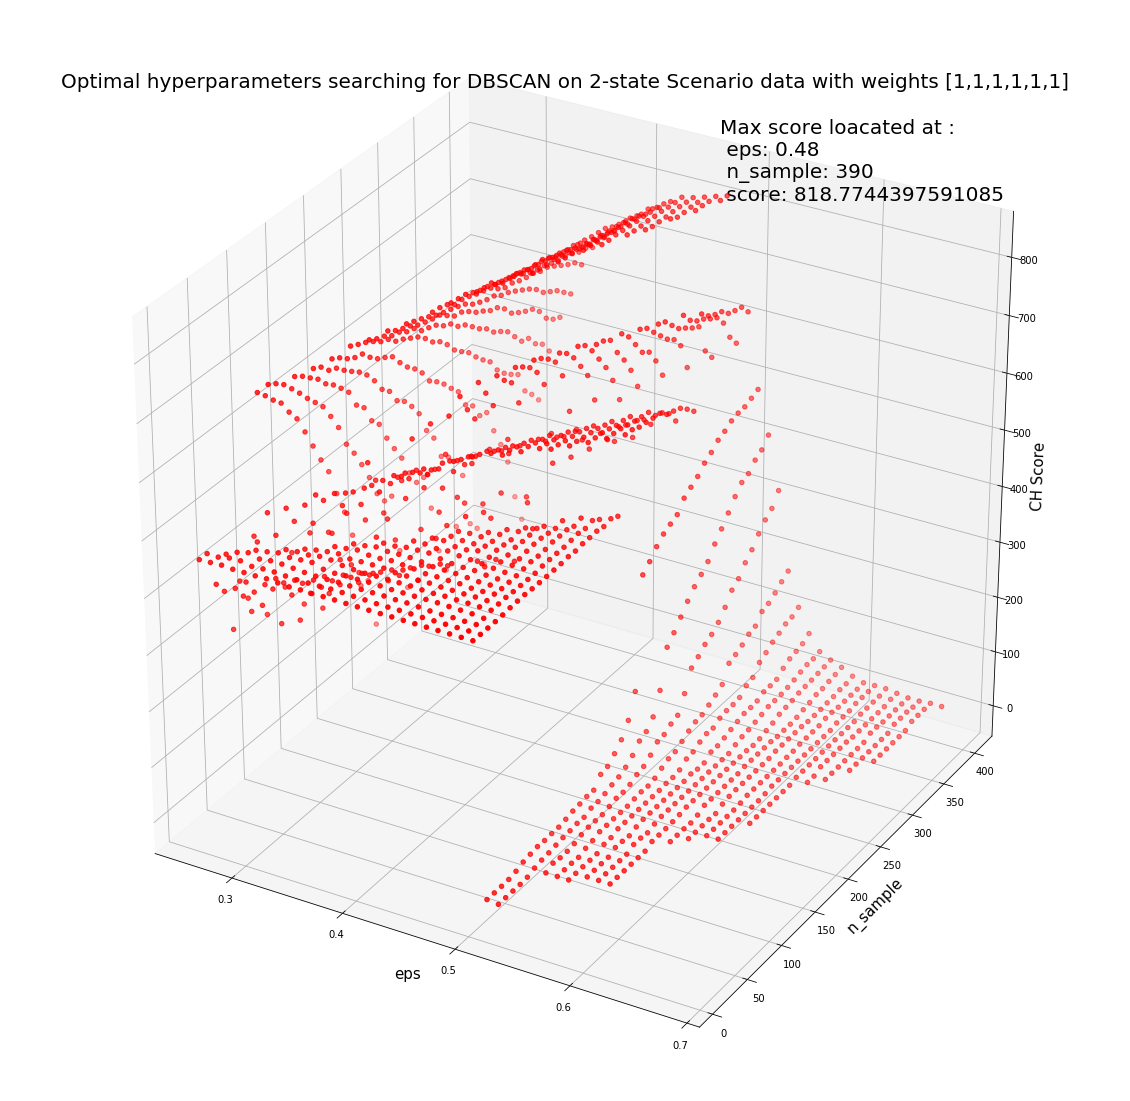

In [21]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
#x_surf, y_surf = np.meshgrid(eps, np)
#ax.plot_surface(eps, np,score ,rstride=1,cstride=1,cmap=plt.cm.hot)#生成一个曲面
#ax.contourf(X,Y,Z,offset=2,alpha=0.75,cmap=plt.cm.hot)#为等高线填充颜色
#ax.contour(x_surf, y_surf, score, offset=-2, colors='black')
#ax.plot_trisurf(eps, np1,score.ravel(), cmap=plt.cm.hot,shade=True)
#ax.contour(eps, np1,score[::-1],offset=2,alpha=0.75,cmap=plt.cm.hot)
#max1 = np.argmax(score)
max_indx = np.argmax(score1)
show_max='Max score loacated at :\n eps: '+str(eps1[max_indx])+' \n n_sample: '+str(np11[max_indx])+' \n score: '+str(score1[max_indx])+''
#plt.annotate(show_max,xytext=(eps[max_indx],np1[max_indx],score[max_indx]),xy=(eps[max_indx],np1[max_indx],score[max_indx]))
ax.text(eps1[max_indx],np11[max_indx],score1[max_indx], show_max , size=20, zorder=1,color='k')
ax.scatter(eps1, np11, score1, c='red', cmap=plt.cm.hot)
ax.set_title('Optimal hyperparameters searching for DBSCAN on 2-state Scenario data with weights [1,1,1,1,1,1]',fontsize = 20)
ax.set_xlabel('eps',fontsize = 15)
ax.set_ylabel('n_sample',fontsize = 15)
ax.set_zlabel('CH Score',fontsize = 15)
plt.show()

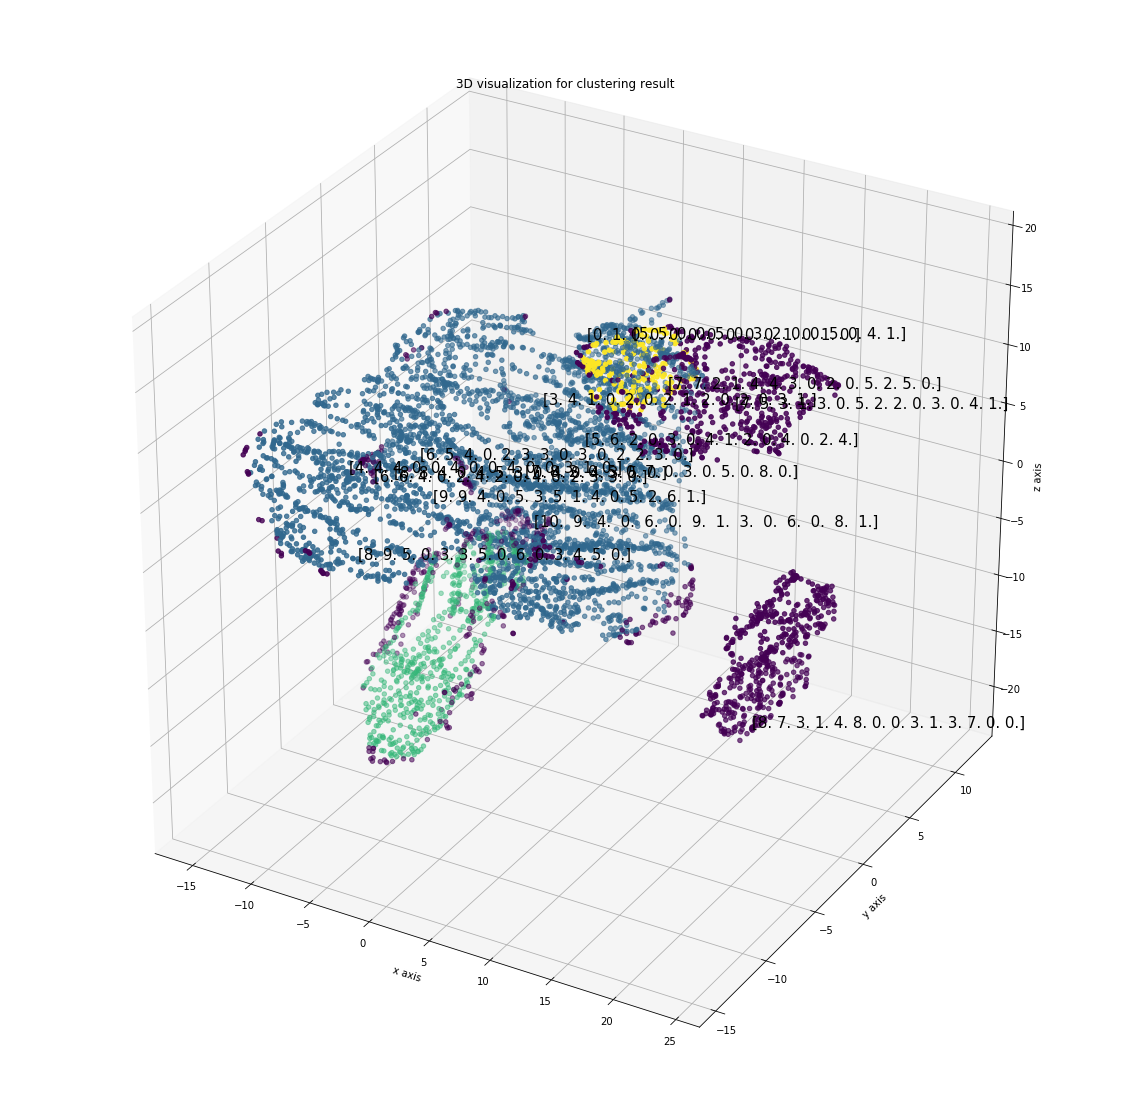

In [23]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x0 = [] 
y0 = []
z0 = []
pred0 = []
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
x6 = [] 
y6 = []
z6 = []
pred6 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(clustering2.labels_[i])
for i in range(len(data[:,0])):
    if clustering2.labels_[i] == -1:
        x0.append(data[i,0])
        y0.append(data[i,1])
        z0.append(data[i,2])
        pred0.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 4:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(clustering2.labels_[i])
    else:
        x6.append(data[i,0])
        y6.append(data[i,1])
        z6.append(data[i,2])
        pred6.append(clustering2.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
ax.scatter(x3, y3, z3, c = 'green',label = 'Cluster 3')
#ax.scatter(x4, y4, z4, c = 'yellow',label = 'Cluster 4')
#ax.scatter(x5, y5, z5, c = '#800080',label = 'Cluster 5')
ax.scatter(x0, y0, z0, c = 'orange',label = 'Outlier')
for i in range(int(len(data)/1000)):
    ax.text(x[1000*i], y[1000*i], z[1000*i],str1[1000*i],
             fontsize=15)
plt.title("3D visualization for DBSCAN clustering result in case of [1,1,1,1,1,1]",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()

# weight [2,3,1,1,2,1]

In [26]:
weight = [1,3,1,1,1,1,1,3,1,1,1,1]

matrix1 = matrix_2st[:,2:]
matrix1.shape

matrixst1 = matrix1

matrixst1

array([[ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       ...,
       [ 7.,  0.,  7., ...,  0.,  3., 12.],
       [ 0.,  0., 16., ...,  0., 11.,  5.],
       [ 0.,  0., 16., ...,  0., 12.,  5.]])

In [27]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler1.fit(matrixst1)
matrix1st = scaler1.transform(matrixst1)
matrix1st[:,0]*=weight[0]
matrix1st[:,1]*=weight[1]
matrix1st[:,2]*=weight[2]
matrix1st[:,3]*=weight[3]
matrix1st[:,4]*=weight[4]
matrix1st[:,5]*=weight[5]
matrix1st[:,6]*=weight[6]
matrix1st[:,7]*=weight[7]
matrix1st[:,8]*=weight[8]
matrix1st[:,9]*=weight[9]
matrix1st[:,10]*=weight[10]
matrix1st[:,11]*=weight[11]
clustering3 = DBSCAN(0.28,80).fit(matrix1st)
label3 = clustering3.labels_
print(len(np.unique(clustering3.labels_)))
print(clustering3.labels_)
#matrix1 = np.c_[matrix_1st, kmeans1.labels_]

4
[ 0  0  0 ... -1 -1 -1]


In [28]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
eps2=[]
np12=[]
score2 = []
for k in range(0, 60):
    ep = 0.26 + 0.01*k
    for i in range(0,40):   
        npp = 10 +10*i
        dbscan = DBSCAN(ep,npp).fit(matrix1st)
        labels = dbscan.labels_
        try:
            ch = metrics.calinski_harabasz_score(matrix1st, labels)
            print(ep,npp,ch)
            eps2.append(ep)
            np12.append(npp)
            score2.append(ch)
        except ValueError:
            print('shit!')

0.26 10 3680.662351828728
0.26 20 3412.236204521883
0.26 30 2497.166296056227
0.26 40 2129.380323109238
0.26 50 1435.3572811553438
0.26 60 1594.6271762585168
0.26 70 1188.8119741755684
0.26 80 1608.452377341098
0.26 90 2718.399258154114
0.26 100 2628.7303615697506
0.26 110 2521.17306760499
0.26 120 2428.5120527878476
0.26 130 2269.3884688392695
0.26 140 2142.010880361676
0.26 150 1927.1465702626833
0.26 160 1730.2429596771005
0.26 170 1494.1198217755332
0.26 180 1363.478251243311
0.26 190 1178.553714337187
0.26 200 915.0742251697039
0.26 210 739.3092142887206
0.26 220 284.1554914896865
0.26 230 280.4178268768852
0.26 240 78.81859060419463
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
shit!
0.27 10 3719.1526432406404
0.27 20 3495.4304620777916
0.27 30 3185.0417731933567
0.27 40 2317.6375747842453
0.27 50 1969.4450488258872
0.27 60 1541.7252658542752
0.27 70 1893.1124682591942
0.27 80 1063.9153607881708
0.27 90 2824.2484196929363
0.27 100 2768.

0.33 390 1805.1780776983414
0.33 400 1695.9782960933553
0.34 10 3864.317289675426
0.34 20 3831.9694760835678
0.34 30 3777.163814734212
0.34 40 3669.4152256192233
0.34 50 3519.315029430483
0.34 60 3456.574949304517
0.34 70 3352.985582634992
0.34 80 2613.2011147756193
0.34 90 2406.062374501127
0.34 100 2195.0070777392452
0.34 110 3026.7169621491216
0.34 120 2706.580348611929
0.34 130 2466.549887575596
0.34 140 2091.650409386185
0.34 150 1591.4306064699276
0.34 160 1949.1675493471457
0.34 170 3184.1235627753713
0.34 180 3146.2879747583606
0.34 190 3117.457485711248
0.34 200 3088.392303542545
0.34 210 3051.058757690384
0.34 220 3018.3015654321775
0.34 230 2984.045746724807
0.34 240 2952.4361658220487
0.34 250 2923.3722038881524
0.34 260 2859.7382392874756
0.34 270 2826.673228850167
0.34 280 2789.928238402338
0.34 290 2764.5207193475017
0.34 300 2722.319926327375
0.34 310 2692.31695490778
0.34 320 2648.0438085153087
0.34 330 2595.8307894339873
0.34 340 2544.901915320719
0.34 350 2463.873257

0.41000000000000003 150 4300.630768534489
0.41000000000000003 160 4143.659244389477
0.41000000000000003 170 3933.3425844251988
0.41000000000000003 180 3723.5589734620594
0.41000000000000003 190 3494.4377076349847
0.41000000000000003 200 2942.9134263783285
0.41000000000000003 210 3870.5553621145095
0.41000000000000003 220 3771.1507573795857
0.41000000000000003 230 3650.834802788206
0.41000000000000003 240 3444.0431647766973
0.41000000000000003 250 3144.727591298703
0.41000000000000003 260 2188.7506124177085
0.41000000000000003 270 3449.256553495998
0.41000000000000003 280 3434.44620859598
0.41000000000000003 290 3427.043005618138
0.41000000000000003 300 3416.0083003061645
0.41000000000000003 310 3416.0083003061645
0.41000000000000003 320 3401.4514071638046
0.41000000000000003 330 3376.0021710530978
0.41000000000000003 340 3354.439178832927
0.41000000000000003 350 3326.7092574328312
0.41000000000000003 360 3316.127125302456
0.41000000000000003 370 3294.5349506378525
0.41000000000000003 3

0.47 170 3716.616151721674
0.47 180 3624.251817899489
0.47 190 4623.621285460595
0.47 200 4563.6831000566435
0.47 210 4488.879277774931
0.47 220 4407.987500482041
0.47 230 4339.6781054152025
0.47 240 4247.564878778423
0.47 250 4131.762601251782
0.47 260 3802.360584425359
0.47 270 3639.918914360576
0.47 280 3100.1929835526544
0.47 290 4118.01496746225
0.47 300 4019.4651078072147
0.47 310 3799.632863766765
0.47 320 3582.007281765623
0.47 330 3396.0154560171327
0.47 340 3257.2588189354015
0.47 350 2991.7653712770843
0.47 360 2493.0506445858755
0.47 370 3591.470081957592
0.47 380 3587.477153536329
0.47 390 3575.909814333749
0.47 400 3572.0875529270884
0.48 10 3934.2308451342415
0.48 20 3934.2308451342415
0.48 30 3921.831558998305
0.48 40 3917.7720308676085
0.48 50 3913.659405071463
0.48 60 3913.659405071463
0.48 70 3911.410254593713
0.48 80 3898.6404586293183
0.48 90 3890.5610441314543
0.48 100 3889.3059053891866
0.48 110 3887.962656957646
0.48 120 3877.230207232907
0.48 130 3858.236939101

0.55 10 3941.837399204448
0.55 20 3941.837399204448
0.55 30 3941.837399204448
0.55 40 3941.837399204448
0.55 50 3941.837399204448
0.55 60 3928.6472896353703
0.55 70 3926.697253580056
0.55 80 3921.4946551962757
0.55 90 3919.017585651365
0.55 100 3919.2616793491393
0.55 110 3916.2541568173715
0.55 120 3915.988865751963
0.55 130 3915.988865751963
0.55 140 3913.5839768977844
0.55 150 3909.9415205872906
0.55 160 3909.760072738679
0.55 170 3908.993513203762
0.55 180 3908.993513203762
0.55 190 3905.504858301898
0.55 200 3901.854867485315
0.55 210 3891.1963317089608
0.55 220 3880.7133840476877
0.55 230 3851.797091218997
0.55 240 3839.940153446642
0.55 250 3823.942751257703
0.55 260 3803.15639496164
0.55 270 3756.7431868206663
0.55 280 4903.015793326414
0.55 290 4881.09440330269
0.55 300 4799.352919546855
0.55 310 4680.886276023776
0.55 320 4625.172697077235
0.55 330 4582.025330757563
0.55 340 4545.831684584212
0.55 350 4428.966590632718
0.55 360 4386.951422095201
0.55 370 4193.90841283717
0.55

0.6000000000000001 280 3881.6838472976715
0.6000000000000001 290 3864.772468365909
0.6000000000000001 300 3846.7751727433147
0.6000000000000001 310 3838.7052404023284
0.6000000000000001 320 3840.9480982562136
0.6000000000000001 330 3804.323383601249
0.6000000000000001 340 4986.397476273067
0.6000000000000001 350 4951.485735395354
0.6000000000000001 360 4872.321337736487
0.6000000000000001 370 4858.030147981827
0.6000000000000001 380 4784.0717417223395
0.6000000000000001 390 4770.779489032075
0.6000000000000001 400 4711.13656624971
0.6100000000000001 10 3941.837399204448
0.6100000000000001 20 3941.837399204448
0.6100000000000001 30 3941.837399204448
0.6100000000000001 40 3941.837399204448
0.6100000000000001 50 3941.837399204448
0.6100000000000001 60 3941.837399204448
0.6100000000000001 70 3941.837399204448
0.6100000000000001 80 3941.837399204448
0.6100000000000001 90 3941.837399204448
0.6100000000000001 100 3937.7422334395856
0.6100000000000001 110 3937.7422334395856
0.6100000000000001 

0.67 210 3945.7310319140556
0.67 220 3945.7310319140556
0.67 230 3945.7310319140556
0.67 240 3945.7310319140556
0.67 250 3937.9858811414315
0.67 260 3937.309147952327
0.67 270 3937.7685757248846
0.67 280 3941.80118454981
0.67 290 3941.80118454981
0.67 300 3925.976138854407
0.67 310 3924.8707545721836
0.67 320 3924.8707545721836
0.67 330 3928.8912270925707
0.67 340 3926.7553026071214
0.67 350 3916.5243664818336
0.67 360 3912.2413602071374
0.67 370 3911.6151811418754
0.67 380 3892.661394678678
0.67 390 3892.661394678678
0.67 400 5126.29972745119
0.6799999999999999 10 3952.5811617349996
0.6799999999999999 20 3952.5811617349996
0.6799999999999999 30 3952.5811617349996
0.6799999999999999 40 3952.5811617349996
0.6799999999999999 50 3952.5811617349996
0.6799999999999999 60 3952.5811617349996
0.6799999999999999 70 3952.5811617349996
0.6799999999999999 80 3952.5811617349996
0.6799999999999999 90 3952.5811617349996
0.6799999999999999 100 3952.5811617349996
0.6799999999999999 110 3952.58116173499

0.74 200 3952.5811617349996
0.74 210 3952.5811617349996
0.74 220 3952.5811617349996
0.74 230 3950.893959114851
0.74 240 3951.3630952378758
0.74 250 3951.3630952378758
0.74 260 3951.3630952378758
0.74 270 3951.3630952378758
0.74 280 3945.7310319140556
0.74 290 3945.7310319140556
0.74 300 3945.7310319140556
0.74 310 3945.7310319140556
0.74 320 3945.7310319140556
0.74 330 3945.7310319140556
0.74 340 3943.1573140596665
0.74 350 3943.1573140596665
0.74 360 3943.699511936599
0.74 370 3943.699511936599
0.74 380 3949.281130717132
0.74 390 3957.4072490321173
0.74 400 3960.8489310267746
0.75 10 3952.5811617349996
0.75 20 3952.5811617349996
0.75 30 3952.5811617349996
0.75 40 3952.5811617349996
0.75 50 3952.5811617349996
0.75 60 3952.5811617349996
0.75 70 3952.5811617349996
0.75 80 3952.5811617349996
0.75 90 3952.5811617349996
0.75 100 3952.5811617349996
0.75 110 3952.5811617349996
0.75 120 3952.5811617349996
0.75 130 3952.5811617349996
0.75 140 3952.5811617349996
0.75 150 3952.5811617349996
0.75 

0.81 380 3951.0207559648306
0.81 390 3951.3630952378758
0.81 400 3951.3630952378758
0.8200000000000001 10 3952.5811617349996
0.8200000000000001 20 3952.5811617349996
0.8200000000000001 30 3952.5811617349996
0.8200000000000001 40 3952.5811617349996
0.8200000000000001 50 3952.5811617349996
0.8200000000000001 60 3952.5811617349996
0.8200000000000001 70 3952.5811617349996
0.8200000000000001 80 3952.5811617349996
0.8200000000000001 90 3952.5811617349996
0.8200000000000001 100 3952.5811617349996
0.8200000000000001 110 3952.5811617349996
0.8200000000000001 120 3952.5811617349996
0.8200000000000001 130 3952.5811617349996
0.8200000000000001 140 3952.5811617349996
0.8200000000000001 150 3952.5811617349996
0.8200000000000001 160 3952.5811617349996
0.8200000000000001 170 3952.5811617349996
0.8200000000000001 180 3952.5811617349996
0.8200000000000001 190 3952.5811617349996
0.8200000000000001 200 3952.5811617349996
0.8200000000000001 210 3952.5811617349996
0.8200000000000001 220 3952.5811617349996
0

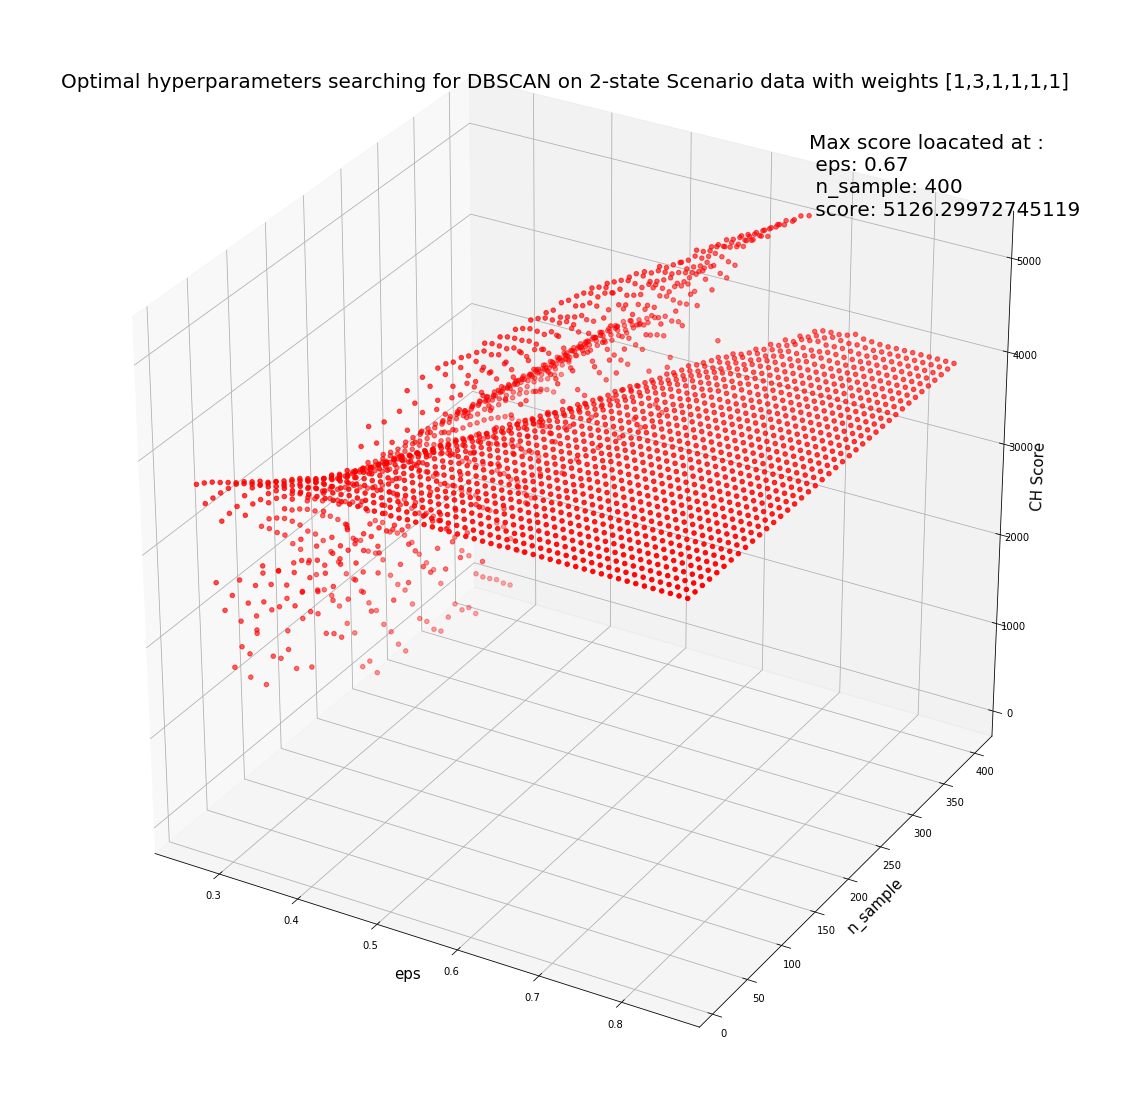

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (20,20))
ax = fig.add_subplot(111, projection='3d')
#x_surf, y_surf = np.meshgrid(eps, np)
#ax.plot_surface(eps, np,score ,rstride=1,cstride=1,cmap=plt.cm.hot)#生成一个曲面
#ax.contourf(X,Y,Z,offset=2,alpha=0.75,cmap=plt.cm.hot)#为等高线填充颜色
#ax.contour(x_surf, y_surf, score, offset=-2, colors='black')
#ax.plot_trisurf(eps, np1,score.ravel(), cmap=plt.cm.hot,shade=True)
#ax.contour(eps, np1,score[::-1],offset=2,alpha=0.75,cmap=plt.cm.hot)
#max1 = np.argmax(score)
max_indx = np.argmax(score2)
show_max='Max score loacated at :\n eps: '+str(eps2[max_indx])+' \n n_sample: '+str(np12[max_indx])+' \n score: '+str(score2[max_indx])+''
#plt.annotate(show_max,xytext=(eps[max_indx],np1[max_indx],score[max_indx]),xy=(eps[max_indx],np1[max_indx],score[max_indx]))
ax.text(eps2[max_indx],np12[max_indx],score2[max_indx], show_max , size=20, zorder=1,color='k')
ax.scatter(eps2, np12, score2, c='red', cmap=plt.cm.hot)
ax.set_title('Optimal hyperparameters searching for DBSCAN on 2-state Scenario data with weights [1,3,1,1,1,1]',fontsize = 20)
ax.set_xlabel('eps',fontsize = 15)
ax.set_ylabel('n_sample',fontsize = 15)
ax.set_zlabel('CH Score',fontsize = 15)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# tsne = TSNE(n_components = 3)
# data = tsne.fit_transform(matrix1st)
tsne = TSNE(n_components = 3)
data = tsne.fit_transform(matrix1st)
#visualize the results
x0 = [] 
y0 = []
z0 = []
pred0 = []
x = [] 
y = []
z = []
pred = []
x1 = [] 
y1 = []
z1 = []
pred1 = []
x2 = [] 
y2 = []
z2 = []
pred2 = []
x3 = [] 
y3 = []
z3 = []
pred3 = []
x4 = [] 
y4 = []
z4 = []
pred4 = []
x5 = [] 
y5 = []
z5 = []
pred5 = []
x6 = [] 
y6 = []
z6 = []
pred6 = []
for i in range(len(data[:,0])):
    x.append(data[i,0])
    y.append(data[i,1])
    z.append(data[i,2])
    pred.append(clustering2.labels_[i])
for i in range(len(data[:,0])):
    if clustering2.labels_[i] == -1:
        x0.append(data[i,0])
        y0.append(data[i,1])
        z0.append(data[i,2])
        pred0.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 0:
        x1.append(data[i,0])
        y1.append(data[i,1])
        z1.append(data[i,2])
        pred1.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 1:
        x2.append(data[i,0])
        y2.append(data[i,1])
        z2.append(data[i,2])
        pred2.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 2:
        x3.append(data[i,0])
        y3.append(data[i,1])
        z3.append(data[i,2])
        pred3.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 3:
        x4.append(data[i,0])
        y4.append(data[i,1])
        z4.append(data[i,2])
        pred4.append(clustering2.labels_[i])
    if clustering2.labels_[i] == 4:
        x5.append(data[i,0])
        y5.append(data[i,1])
        z5.append(data[i,2])
        pred5.append(clustering2.labels_[i])
    else:
        x6.append(data[i,0])
        y6.append(data[i,1])
        z6.append(data[i,2])
        pred6.append(clustering2.labels_[i])
# for i in range(len(data[:,0])):
#     if kmeans1.labels_[i] == 0:
#         label1.append((data[i,0]data[i,1]data[i,2]))

fig = plt.figure(figsize = (20,20))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1, y1, z1, c = 'red',label = 'Cluster 1')
ax.scatter(x2, y2, z2, c = 'blue',label = 'Cluster 2')
ax.scatter(x3, y3, z3, c = 'green',label = 'Cluster 3')
#ax.scatter(x4, y4, z4, c = 'yellow',label = 'Cluster 4')
#ax.scatter(x5, y5, z5, c = '#800080',label = 'Cluster 5')
ax.scatter(x0, y0, z0, c = 'orange',label = 'Outlier')
for i in range(int(len(data)/1000)):
    ax.text(x[1000*i], y[1000*i], z[1000*i],str1[1000*i],
             fontsize=15)
plt.title("3D visualization for DBSCAN clustering result in case of [1,1,1,1,1,1]",fontsize = 20)
ax.set_xlabel('x axis',fontsize = 20)
ax.set_ylabel('y axis',fontsize = 20)
ax.set_zlabel('z axis',fontsize = 20)
ax.legend(fontsize = 25,loc=3)
plt.show()